## Analyse jährliche CO2-Emission
Gruppe: Jessica Itulah, Michelle Assadi, Medhani Kathirkamanathan

Fragestellung:

Welche Unterschiede und Trends lassen sich in den CO₂-Emissionen pro Kopf ausgewählter Länder über den Zeitraum 2000–2024 identifizieren, und welche Faktoren könnten diese Entwicklungen beeinflusst haben?

Quellen

https://ourworldindata.org/grapher/annual-co2-emissions-per-country
 

## 1. Daten beschaffen und laden

In [24]:
import pandas as pd

In [25]:
df = pd.read_csv('annual-co2-emissions-per-country.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','CO2-Emission (Tonnen)']) 
df.head() 

,Gebiet,Code,Jahr,CO2-Emission (Tonnen)
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


## 2. Daten vorbereiten

In [26]:
df_pivot = df.pivot(index='Gebiet', columns='Jahr', values='CO2-Emission (Tonnen)')
df_pivot.head()

Jahr,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9384400.0,8605932.0,9311054.0,10191504.0,10400110.0,11118626.0,9868841.0,10169889.0,10516319.0,10825998.0
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4712144.0,4555035.0,5343792.0,5194860.0,4940528.0,4865033.0,5137011.0,4498282.0,4417333.0,4444448.0
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,160321620.0,158308320.0,165251630.0,174461180.0,182425000.0,171138530.0,182035800.0,192778560.0,202846660.0,198203180.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,465328.0,472656.0,472656.0,498304.0,490976.0,377392.0,414032.0,423408.0,418098.0,424663.0
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27505228.0,25465634.0,23600984.0,23278050.0,22210076.0,16549341.0,19218562.0,21089004.0,21674816.0,22333584.0


## 3. Statistik der Roh-Daten

In [27]:
df.dtypes

Gebiet                    object
Code                      object
Jahr                       int64
CO2-Emission (Tonnen)    float64
dtype: object

### 3.1 Analyse Gebiete

In [28]:
print('Anzahl verschiedener Gebiete: ', len(df['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  214


In [29]:
df['Gebiet'].value_counts()

Gebiet
Australia               275
New Zealand             275
United Kingdom          275
Taiwan                  275
Norway                  275
                       ... 
Namibia                  34
Micronesia (country)     33
Marshall Islands         33
East Timor               31
Kosovo                   31
Name: count, Length: 214, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

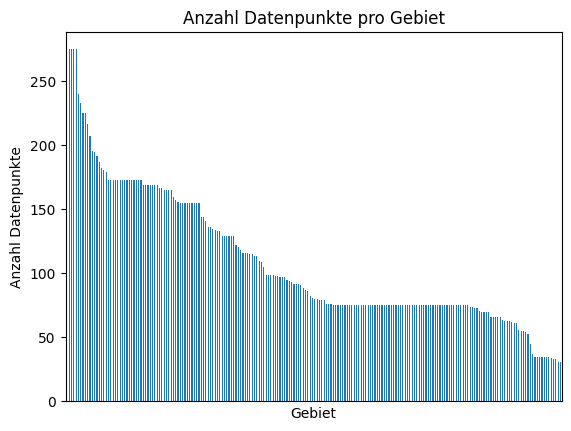

In [30]:
df['Gebiet'].value_counts().plot(kind='bar',
                                 xticks=[],
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

### 3.2 Analyse Codes

In [31]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  214


In [32]:
df['Code'].value_counts()

Code
AUS         275
NZL         275
GBR         275
TWN         275
NOR         275
           ... 
NAM          34
FSM          33
MHL          33
TLS          31
OWID_KOS     31
Name: count, Length: 214, dtype: int64

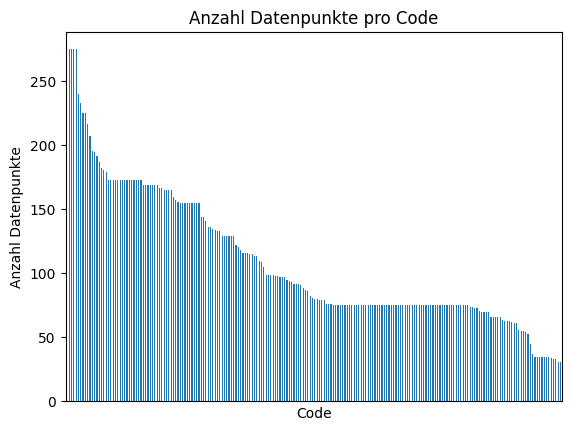

In [33]:
df['Code'].value_counts().plot(kind='bar' ,xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

### 3.3 Analyse Jahr

In [34]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  275


In [35]:
df['Jahr'].value_counts().sort_index()

Jahr
1750      5
1751      5
1752      5
1753      5
1754      5
       ... 
2020    214
2021    214
2022    214
2023    214
2024    214
Name: count, Length: 275, dtype: int64

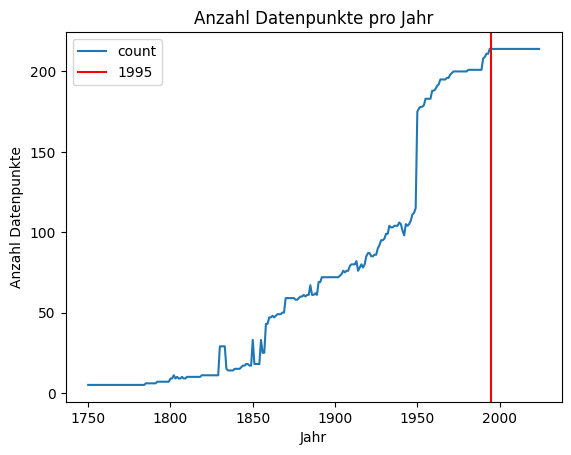

In [36]:
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=1995, color='red',label='1995')
g.legend()

### 3.4 Analyse CO2-Emission

In [37]:
df.describe()

,Jahr,CO2-Emission (Tonnen)
count,23356.000000,2.335600e+04
mean,1956.565508,7.720689e+07
std,52.458529,4.379736e+08
min,1750.000000,0.000000e+00
25%,1927.000000,2.701218e+05
50%,1968.000000,2.824004e+06
75%,1997.000000,2.284310e+07
max,2024.000000,1.228904e+10


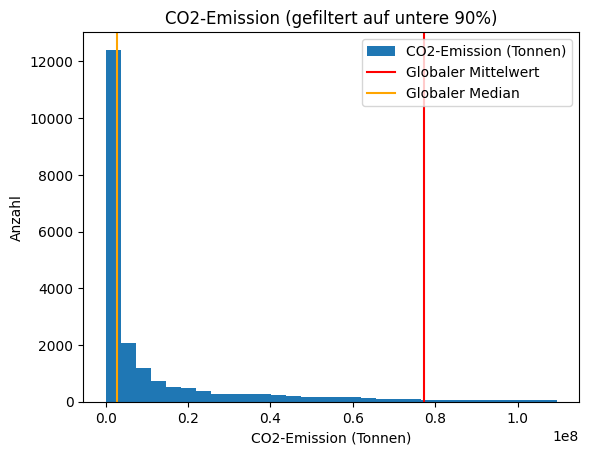

In [79]:
data_filtered = df[df['CO2-Emission (Tonnen)'] <= df['CO2-Emission (Tonnen)'].quantile(0.90)]
g = data_filtered['CO2-Emission (Tonnen)'].plot(
    kind='hist', 
    bins=30, 
    title='CO2-Emission (gefiltert auf untere 90%)',
    xlabel='CO2-Emission (Tonnen)', 
    ylabel='Anzahl'
)
g.axvline(df['CO2-Emission (Tonnen)'].mean(), color='red', label='Globaler Mittelwert')
g.axvline(df['CO2-Emission (Tonnen)'].median(), color='orange', label='Globaler Median')
g.legend()

## 4. Analyse

### Vorgehen
### Beobachtungen
Von allen Ländern der Welt verursacht China die höchste CO2 Emission, gefolgt von Indien, Indonesien, Iran und Saudi Arabien. Alle Länder liegen im grössten Kontinent der Welt, Asien. Alle fünf Länder haben eine sehr grosse Einwohnerzahl. China und Indien haben ihre CO2 Emission innerhalb 24 Jahren mehr als verdreifacht (Zuwachs von ca. 237% bzw. 223%). Indonesien zeigt ebenfalls eine fast Verdreifachung (ca. 189% Zuwachs) und selbst die Länder mit dem "geringsten" Wachstum (Iran und Saudi-Arabien) haben ihre Emissionen mehr als verdoppelt (über 100% Zuwachs). China Zeigte ein extrem steiles Wachstum bis ca. 2012, danach flachte die Kurve etwas ab (Plateau-Bildung um 2015), bevor sie in den letzten Jahren wieder deutlich anstieg. In der 2. Grafik kann man ganz deutlich einen Corona-Knick erkennen, vorallem bei Indien ist es sehr deutlich. Betrachtet man die absoluten Zahlen, wird klar, dass die globalen Auswirkungen Chinas (mit einem Zuwachs von über 8,6 Milliarden Tonnen) die der anderen Länder bei weitem überwiegen.

### Interpretation
#### China
Seit dem Jahr 2001 ist die CO2 Emission in China astronomisch gestiegen, das liegt daran, dass China eine extreme Urbanisierung hatte und heute das Land mit den zweit meisten Einwohnern der Welt ist. Ausserdem sind sie wirtschaftlich sehr stark, seitdem sie 2001 der WTO (World Trade Organisation) beigetreten sind, ist die CO2 Emission sehr stark angestiegen. Sie besitzen viele Fabriken und stellen eine unglaubliche Menge an Waren her um sie ins Ausland zu exportieren. 2015 wollten sie ihre CO2 Emission verringern konnten dies nicht durchziehen, da sie eine zu grosse Rolle in der Fabrizierung und Vertreibung auf der Welt haben. Das Pariser Klimaschutzabkommen im Jahr 2015 vereinbarte eine emissionsarme Treibhausgas Entwicklung und 180 Staaten bemühen sich langfristig darum.
Quellen: https://www.wto.org/english/thewto_e/countries_e/china_e.htm
        https://www.fedlex.admin.ch/eli/cc/2017/619/de
#### Indien
Indien ist das Land mit der grössten Bevölkerungszahl und sie wächst kontinuierlich. Gründe für die hohe CO2 Emission sind: Die zunehmende Industrialisierung, Bevölkerungswachstum und klimabedingte Hitzewellen erhöhen den Energiebedarf stark.
Quellen: https://www.fr.de/politik/kohle-statt-klima-indien-riskiert-seine-energiewende-94075005.html

#### Indonesien
Indonesien schwankt kontant das liegt daran, dass sie ihre Energie fast nur aus Kohlekraftwerke gewinnen. Seit dem Jahr 2021 haben sie ihre Genehmigung verloren neue Kohlekraftwerke zu bauen, jedoch diejenigen die schon im Bau waren konnten/werden noch fertiggestellt. Dadurch, dass Indonesien eine grosse Bevölkerung hat und ein sehr stark klimatisiertes Land ist benötigen sie viel Energie.
Quelle: https://www.energiezukunft.eu/politik/indonesien-genehmigt-keine-neuen-kohlekraftwerke-mehr

#### Iran
Iran ist einer der grössten Erdöl Gewinner der Welt. Deswegen ist Benzin relativ günstig, dies sorgt dafür, dass mehr Menschen mit dem Auto unterwegs sind. Die grösste Quelle der CO2 Emission des Irans ist die Verbrennung von Erdöl für Fahrzeuge, Maschinen und Energiegewinnung. Irans CO2 Emission ist politisch abhängig, oftmals wenn sie sich in einer brenzligen Lage befinden steigt die CO2 Emission.

Quelle: https://www.iea.org/countries/Iran/emissions#what-are-the-main-sources-of-co2-emissions-in-iran

### Berechnungen

In [57]:
diffs = df_pivot[2024]-df_pivot[2000]   
diffs = diffs.sort_values().dropna()  
diffs

Gebiet
United States    -1.119038e+09
Germany          -3.266566e+08
Japan            -2.983357e+08
United Kingdom   -2.561281e+08
Italy            -1.676685e+08
                      ...     
Saudi Arabia      3.824944e+08
Iran              4.254179e+08
Indonesia         5.311658e+08
India             2.206413e+09
China             8.645228e+09
Length: 214, dtype: float64

<Axes: title={'center': 'Grösste 5 Differenzen der CO-2 Emission'}, ylabel='Gebiet'>

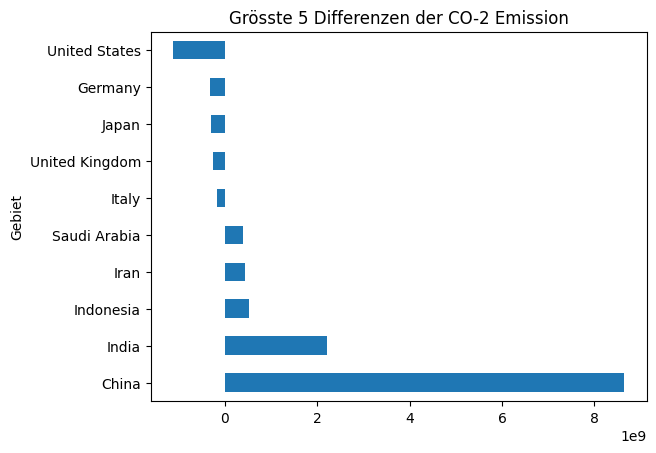

In [71]:
diff_sel = (diffs < -1.5e8) | (diffs > 3.5e8)
diffs[diff_sel].plot(kind='barh', title='Grösste 5 Differenzen der CO-2 Emission') #X-Achse benennen


In [59]:
Gebiets_liste = diffs[diff_sel].nlargest(5).index.tolist()
print(Gebiets_liste)


['China', 'India', 'Indonesia', 'Iran', 'Saudi Arabia']


### Visualisierung

In [60]:
#start_year = base_year = df_pivot.index.min()
#df_norm = df_pivot.div(df_pivot.loc[base_year]).mul(100)
#df_norm

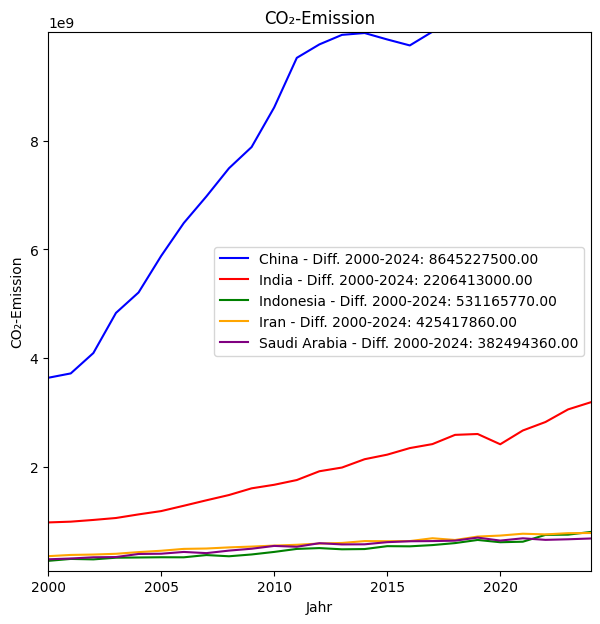

In [61]:
color_dict = {
    'China': 'blue',
    'India': 'red',
    'Indonesia': 'green',
    'Iran': 'orange',
    'Saudi Arabia': 'purple'
}

for gebiet in Gebiets_liste:
    diff = diffs[gebiet]
    g = df_pivot.loc[gebiet].plot(title='CO₂-Emission', xlabel='Jahr', ylabel=f'CO₂-Emission', legend=True,
                                  label=f'{gebiet} - Diff. 2000-2024: {diff:.2f}',
                                  xlim=[2000,2024], ylim=[100000000,9999999999], 
                                  color=color_dict[gebiet],        
                                  figsize=(7,7))                   



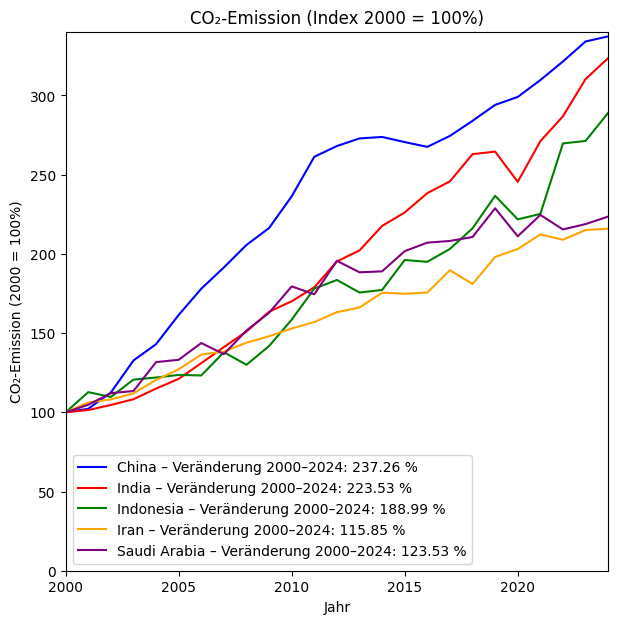

In [62]:
color_dict = {
    'China': 'blue',
    'India': 'red',
    'Indonesia': 'green',
    'Iran': 'orange',
    'Saudi Arabia': 'purple'
}

for gebiet in Gebiets_liste:
    # Zeitreihe des Landes
    serie = df_pivot.loc[gebiet]

    # Normierung auf Startjahr 2000 = 100 %
    serie_norm = serie / serie.loc[2000] * 100

    diff = serie_norm.loc[2024] - 100

    g = serie_norm.plot(
        title='CO₂-Emission (Index 2000 = 100%)',
        xlabel='Jahr',
        ylabel='CO₂-Emission (2000 = 100%)',
        legend=True,
        label=f'{gebiet} – Veränderung 2000–2024: {diff:.2f} %',
        xlim=[2000, 2024],
        ylim=[0, serie_norm.max() * 1.05+100],
        color=color_dict[gebiet],
        figsize=(7, 7)
    )
